In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_x=np.load(r'C:\IITB\FML\HW1\cs725-hw\hw1\data\binary\val_x.npy')[:4,:]
train_y=np.load(r'C:\IITB\FML\HW1\cs725-hw\hw1\data\binary\val_y.npy')[:4]


In [49]:
import numpy as np


def standardize(input_x,d):
    means=[]
    for i in range(d):
        means.append(np.mean(input_x[:,i]))
    # print(means)
    stds=[]
    for i in range(d):
        stds.append(np.std(input_x[:,i]))
    # print(stds)
    for i in range(d):
        x=input_x[:,i]
        x=(x-means[i])/stds[i]
        # print(x)
        input_x[:,i]=x
    # print(input_x)
    return input_x

def normalize(input_x):
    maxv=[]
    minv=[]
    for  i in range(2):
       minv.append(np.min(input_x[:,i]))
       maxv.append(np.max(input_x[:,i]))

    for i in range(2):
        x=input_x[:,i]
        x=(x-minv[i])/(maxv[i]-minv[i])
        input_x[:,i]=x
    print(maxv)
    print(minv)
    print(input_x)
    return input_x    

class LogisticRegression:
    def __init__(self):
        """
        Initialize `self.weights` properly. 
        Recall that for binary classification we only need 1 set of weights (hence `num_classes=1`).
        We have given the default zero intialization with bias term (hence the `d+1`).
        You are free to experiment with various other initializations including random initialization.
        Make sure to mention your initialization strategy in your report for this task.
        """
        self.num_classes = 1 # single set of weights needed
        self.d = 2 # input space is 2D. easier to visualize
        self.weights = np.zeros((self.d+1, self.num_classes))
        # self.velocity=np.zeros((self.d+1,self.num_classes))
    

    
    def preprocess(self, input_x):
        """
        Preprocess the input any way you seem fit.
        """
        # print(input_x)
        return standardize(input_x,self.d)
    
    def hofx(self,x):
        x=np.hstack((np.ones((x.shape[0],1)),x))
        # print("In h(x):\n\n x :\n",x[0:10,:])
        print("w shape:\n",self.weights)
        z=np.dot(x,self.weights)
        print("z :\n",z)
        return z


    def sigmoid(self, z):
        # print("In sigmoid:\n\n")
        g=1/(1+np.exp(-z))
        """
        Implement a sigmoid function if you need it. Ignore otherwise.
        """
        return g
        

    def calculate_loss(self, input_x, input_y):
        input_y=input_y.reshape((input_y.shape[0],1))
        # print("In loss:\n\n")
        """
        Arguments:
        input_x -- NumPy array with shape (N, self.d) where N = total number of samples
        input_y -- NumPy array with shape (N,)
        Returns: a single scalar value corresponding to the loss.
        """
        p=self.sigmoid(self.hofx(input_x))
        cost=-1/input_x.shape[0]*(np.dot(np.transpose(input_y),np.log(p))+np.dot(np.transpose(1-input_y),np.log(1-p)))
        print("Cost:",cost)
        return cost[0][0]

    def calculate_gradient(self, input_x, input_y):
        input_y=input_y.reshape((input_y.shape[0],1))
        # print("In gradient:\n\n")
        #Gradient of logistic loss dJ/dw is (p-y)*x where p is sig(w.x)
        p=self.sigmoid(self.hofx(input_x))
        print("p ",p)
        print("y",input_y)
        temp=p-input_y
        x=np.hstack((np.ones((input_x.shape[0],1)),input_x))
        # print("x:\n",x)
        print("temp:\n",temp)
        gradient=np.dot(np.transpose(x),temp)
        print("Gradient:\n",gradient)
        """
        Arguments:
        input_x -- NumPy array with shape (N, self.d) where N = total number of samples
        input_y -- NumPy array with shape (N,)
        Returns: the gradient of loss function wrt weights.
        Ensure that gradient.shape == self.weights.shape.
        """
        return gradient

    def update_weights(self, grad, learning_rate, momentum):
        # print("In update:\n\n")
        
        """
        Arguments:
        grad -- NumPy array with same shape as `self.weights`
        learning_rate -- scalar
        momentum -- scalar
        Returns: nothing
        The function should update `self.weights` with the help of `grad`, `learning_rate` and `momentum`
        """
        # self.velocity=momentum*self.velocity+(1-momentum)*grad
        # self.weights=self.weights-learning_rate*self.velocity
        # print(grad,learning_rate)
        # print(learning_rate*grad[0][0])
        # print(grad.reshape((grad.shape[0]))*learning_rate)
        print("test:",grad*learning_rate)
        self.weights=self.weights-learning_rate*grad
        pass

    def get_prediction(self, input_x):
        print("In prediction:\n\n")
        """
        Arguments:
        input_x -- NumPy array with shape (N, self.d) where N = total number of samples
        Returns: a NumPy array with shape (N,) 
        The returned array must be the list of predicted class labels for every input in `input_x`
        """
        print("Weigths: ",self.weights)
        z=self.hofx(input_x)
        g=self.sigmoid(z)
        print("g:",g)
        y=[]
        for i in g:
            if i>=0.3:
                y.append(1)
            else:
                y.append(0)
        y=np.array(y)
        return y


In [62]:
model=LogisticRegression()
train_x = model.preprocess(train_x)
train_losses = []
train_accs = []
w=[]
for e in range(4):
    # print("Epoch ",e)
    # calculate gradient. ensure grad.shape == model.weights.shape
    print("X :",train_x)
    grad = model.calculate_gradient(train_x, train_y)
    model.update_weights(grad, 1,0)

    # # weight update completed, calculate loss/accuracy on train and validation splits
    train_loss = model.calculate_loss(train_x, train_y)
    train_y_pred = model.get_prediction(train_x)
    # # print(train_y_pred,train_y)
    # # tempy=train_y.reshape((train_y.shape[0]))
    # # print(np.sum(temp),train_y.shape,train_y_pred.shape)
    # print(train_y,train_y_pred)
    train_acc = (train_y_pred==train_y).mean()

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    w=model.weights
    print("---------------------------------------------------------------------------------------------------")
print(train_losses)
print(train_accs)
print(w)

X : [[ 1.53141053  0.54057815]
 [-0.68240752 -1.60114833]
 [-1.06820124  1.06958775]
 [ 0.21919824 -0.00901757]]
w shape:
 [[0.]
 [0.]
 [0.]]
z :
 [[0.]
 [0.]
 [0.]
 [0.]]
p  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
y [[1]
 [0]
 [0]
 [0]]
temp:
 [[-0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]]
Gradient:
 [[ 1.        ]
 [-1.53141053]
 [-0.54057815]]
test: [[ 1.        ]
 [-1.53141053]
 [-0.54057815]]
w shape:
 [[-1.        ]
 [ 1.53141053]
 [ 0.54057815]]
z :
 [[ 1.63744295]
 [-2.91059187]
 [-2.05765886]
 [-0.66919221]]
Cost: [[0.19111556]]
In prediction:


Weigths:  [[-1.        ]
 [ 1.53141053]
 [ 0.54057815]]
w shape:
 [[-1.        ]
 [ 1.53141053]
 [ 0.54057815]]
z :
 [[ 1.63744295]
 [-2.91059187]
 [-2.05765886]
 [-0.66919221]]
g: [[0.8371867 ]
 [0.05163245]
 [0.11328078]
 [0.33867774]]
---------------------------------------------------------------------------------------------------
X : [[ 1.53141053  0.54057815]
 [-0.68240752 -1.60114833]
 [-1.06820124  1.06958775]
 [ 0.21919824 -0.00901757]]
w shape:
 [[-

In [61]:
# w=w.reshape((w.shape[0]))
# print(w)
# def fun(x):
#     return -w[1]*x*1/w[2]
# temp=[]
# for i in range(150):
#     temp.append(fun(i))
# plt.scatter(range(150),train_x[:,0])
# plt.scatter(range(150),train_x[:,1])
# plt.plot(range(150),temp)

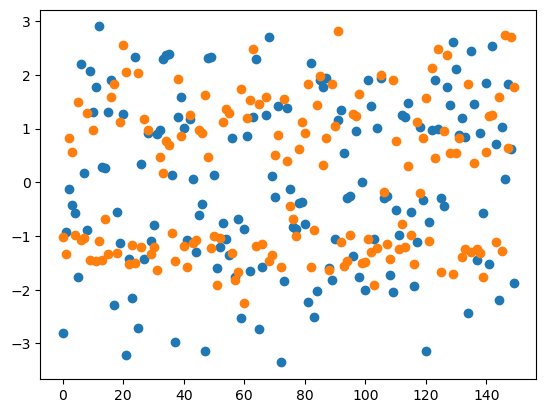

In [55]:
train_x=np.load(r'C:\IITB\FML\HW1\cs725-hw\hw1\data\binary\train_x.npy')
train_y=np.load(r'C:\IITB\FML\HW1\cs725-hw\hw1\data\binary\val_y.npy')
plt.scatter(range(150),train_x[:,0])
plt.scatter(range(150),train_x[:,1])

In [64]:
from tensorflow import keras

: 

In [ ]:
model=keras.